In [1]:
import numpy as np
import pandas as pd
import math
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Master Data Sets.ipynb")
from matplotlib import pyplot as plt
from ast import literal_eval
from sklearn.metrics.pairwise import haversine_distances
import itertools
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [2]:
train_cust =pd.read_csv('train_customers.csv',parse_dates=['created_at','updated_at'])
test_cust =pd.read_csv('test_customers.csv',parse_dates=['created_at','updated_at'])
train_loc =pd.read_csv('train_locations.csv')
test_loc =pd.read_csv('test_locations.csv')
vendors =pd.read_csv('vendors.csv',parse_dates=['created_at','updated_at'])
orders =pd.read_csv('orders.csv',parse_dates=['created_at','delivery_date'])
submission =pd.read_csv('SampleSubmission.csv')
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", 200)

/Users/apple/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (15,16,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
train_cust= train_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)
test_cust= test_cust.rename({'akeed_customer_id': 'customer_id'}, axis=1)

In [4]:
test_cust = test_cust.drop_duplicates(subset='customer_id', keep="first")
train_cust = train_cust.drop_duplicates(subset='customer_id', keep="first")

In [5]:
train =pd.merge(train_loc, train_cust, on ='customer_id', how ='left')
test =pd.merge(test_loc, test_cust, on ='customer_id', how ='left')

In [6]:
test.shape

(16720, 12)

In [7]:
test1= test[['customer_id','location_number']]
train1= train[['customer_id','location_number']]
vendors1= vendors[['id']]
vendors1.head()


,id
0,4
1,13
2,20
3,23
4,28


In [8]:
test=test1.assign(key=1).merge(vendors1.assign(key=1), on='key').drop('key',axis=1)
train=train1.assign(key=1).merge(vendors1.assign(key=1), on='key').drop('key',axis=1)

In [9]:
test.head(10)

,customer_id,location_number,id
0,Z59FTQD,0,4
1,Z59FTQD,0,13
2,Z59FTQD,0,20
3,Z59FTQD,0,23
4,Z59FTQD,0,28
5,Z59FTQD,0,33
6,Z59FTQD,0,43
7,Z59FTQD,0,44
8,Z59FTQD,0,55
9,Z59FTQD,0,66


In [10]:
test.shape

(1672000, 3)

In [11]:
#test.to_csv('Master_test')
#train.to_csv('Master_train')

In [12]:
submission.shape

(1672000, 2)

In [13]:
test1= test[['customer_id','location_number']]
train1= train[['customer_id','location_number']]
vendors1= vendors[['id']]
vendors1.head()

test['id_obj']=test['id'].astype(str)
train['id_obj']=train['id'].astype(str)

In [14]:
test['location_number_obj']=test['location_number'].astype(str)
train['location_number_obj']=train['location_number'].astype(str)
vendors['id_obj']=vendors['id'].astype(str)

In [15]:
test['CID X LOC_NUM X VENDOR'] = test['customer_id'] +' X '+ test['location_number_obj'] +' X '+ test['id_obj']
train['CID X LOC_NUM X VENDOR'] = train['customer_id'] +' X '+ train['location_number_obj'] +' X '+ train['id_obj']

In [16]:
c4 = pd.Series(submission['CID X LOC_NUM X VENDOR'])
c5= pd.Series(test['CID X LOC_NUM X VENDOR'])
c5.append(c4)

0            Z59FTQD X 0 X 4
1           Z59FTQD X 0 X 13
2           Z59FTQD X 0 X 20
3           Z59FTQD X 0 X 23
4           Z59FTQD X 0 X 28
                 ...        
1671995    L9G4OFV X 4 X 907
1671996    L9G4OFV X 5 X 907
1671997    FDZFYBA X 0 X 907
1671998    UTKHR1C X 0 X 907
1671999    3O8LSR3 X 0 X 907
Name: CID X LOC_NUM X VENDOR, Length: 3344000, dtype: object

In [17]:
c5.unique()
c6=set(c5)
print(len(c6))

1672000


In [18]:
train =pd.merge(train, orders, on ='CID X LOC_NUM X VENDOR', how ='left')

In [19]:
train.shape

(6005461, 31)

In [20]:
train.head()

,customer_id_x,location_number,id,id_obj,location_number_obj,CID X LOC_NUM X VENDOR,akeed_order_id,customer_id_y,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE
0,02SFNJH,0,4,4,0,02SFNJH X 0 X 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
1,02SFNJH,0,13,13,0,02SFNJH X 0 X 13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
2,02SFNJH,0,20,20,0,02SFNJH X 0 X 20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
3,02SFNJH,0,23,23,0,02SFNJH X 0 X 23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN
4,02SFNJH,0,28,28,0,02SFNJH X 0 X 28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN


In [21]:
print(train[train['akeed_order_id'].notnull()])

        customer_id_x  location_number   id id_obj location_number_obj  \
143           02SFNJH                1  192    192                   1   
148           02SFNJH                1  199    199                   1   
196           02SFNJH                1  855    855                   1   
235           02SFNJH                2  159    159                   2   
397           RU43CXC                0  856    856                   0   
...               ...              ...  ...    ...                 ...   
6005372       HWELAU8                1   75     75                   1   
6005401       HWELAU8                1  188    188                   1   
6005402       HWELAU8                1  189    189                   1   
6005420       HWELAU8                1  259    259                   1   
6005424       HWELAU8                1  288    288                   1   

        CID X LOC_NUM X VENDOR  akeed_order_id customer_id_y  item_count  \
143          02SFNJH X 1 X 192     

In [22]:
orders.shape

(135303, 26)

In [23]:
train['customer_id_x'].value_counts()

4Y0K8NQ    3038
NETYQ1C    2602
5EP9F62    2008
4UZKXW2    1909
YYKZN0F    1905
           ... 
0MBT2J5     100
5HHJJ7U     100
C8QKVTY     100
OTG9KR0     100
KTDM3HD     100
Name: customer_id_x, Length: 35400, dtype: int64

In [24]:
orders.head()

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,2019-08-01 04:03:00,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


In [25]:
orders['customer_id'].value_counts(normalize=True)

XW90EAP    0.001936
TL7Z2DM    0.001116
VDEJEMP    0.001079
HJFTTGW    0.000946
B28LJKM    0.000880
             ...   
9ATW8VS    0.000007
62V2FP3    0.000007
5I2O72A    0.000007
S7165VN    0.000007
ZX5QP5L    0.000007
Name: customer_id, Length: 27445, dtype: float64

In [26]:
cust_freq=orders['customer_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
cust_freq1=orders['customer_id'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')

In [27]:
cust_freq =pd.merge(cust_freq, cust_freq1, on ='unique_values', how ='left')

In [28]:
cust_freq

,unique_values,counts,normalised
0,XW90EAP,262,0.001936
1,TL7Z2DM,151,0.001116
2,VDEJEMP,146,0.001079
3,HJFTTGW,128,0.000946
4,B28LJKM,119,0.000880
...,...,...,...
27440,9ATW8VS,1,0.000007
27441,62V2FP3,1,0.000007
27442,5I2O72A,1,0.000007
27443,S7165VN,1,0.000007


In [29]:
cust_freq.describe()

,counts,normalised
count,27445.000000,27445.000000
mean,4.929969,0.000036
std,7.621525,0.000056
min,1.000000,0.000007
25%,1.000000,0.000007
50%,2.000000,0.000015
75%,5.000000,0.000037
max,262.000000,0.001936


In [30]:
vend_freq=orders['vendor_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vend_freq1=orders['vendor_id'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')
vend_freq =pd.merge(vend_freq, vend_freq1, on ='unique_values', how ='left')
vend_freq

,unique_values,counts,normalised
0,113,7807,0.057700
1,105,5562,0.041108
2,79,5117,0.037819
3,84,5001,0.036961
4,78,4643,0.034316
5,83,3684,0.027228
6,386,3280,0.024242
7,86,2837,0.020968
8,846,2559,0.018913
9,106,2263,0.016725


In [31]:
vend_freq.describe()

,unique_values,counts,normalised
count,100.000000,100.00000,100.000000
mean,288.840000,1353.03000,0.010000
std,242.299994,1178.32182,0.008709
min,4.000000,474.00000,0.003503
25%,105.750000,730.50000,0.005399
50%,202.000000,941.00000,0.006955
75%,387.250000,1529.50000,0.011304
max,907.000000,7807.00000,0.057700


In [32]:
CLV_freq=orders['CID X LOC_NUM X VENDOR'].value_counts().rename_axis('unique_values').reset_index(name='counts')
CLV_freq1=orders['CID X LOC_NUM X VENDOR'].value_counts(normalize=True).rename_axis('unique_values').reset_index(name='normalised')
CLV_freq =pd.merge(CLV_freq, CLV_freq1, on ='unique_values', how ='left')
CLV_freq 

,unique_values,counts,normalised
0,XW90EAP X 3 X 13,69,0.000510
1,XW90EAP X 0 X 13,68,0.000503
2,KXXRD9J X 2 X 157,62,0.000458
3,3W4JVGN X 1 X 303,61,0.000451
4,TVSPG2H X 0 X 43,51,0.000377
...,...,...,...
80137,SEXRFRJ X 0 X 84,1,0.000007
80138,DV6P190 X 2 X 386,1,0.000007
80139,R2NFI6A X 0 X 845,1,0.000007
80140,2532Y1A X 1 X 79,1,0.000007


In [33]:
CLV_freq.describe()

,counts,normalised
count,80142.000000,80142.000000
mean,1.688291,0.000012
std,1.820141,0.000013
min,1.000000,0.000007
25%,1.000000,0.000007
50%,1.000000,0.000007
75%,2.000000,0.000015
max,69.000000,0.000510


In [34]:
c7= pd.Series(orders['CID X LOC_NUM X VENDOR'])
c7.unique()
c8=set(c7)
print(len(c8))

80142


In [35]:
#Genger distribution of train customers
train_cust['gender']=train_cust['gender'].str.lower()
train_gender=train_cust['gender'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
train_gender


,unique_values,counts
0,male,20578
1,NaN,12154
2,female,1761
3,female,13
4,male,9
5,?????,2
6,female,2
7,female,2
8,,1
9,female,1


In [36]:
train_gender['string_len']=len(train_gender['unique_values'])
train_gender

,unique_values,counts,string_len
0,male,20578,10
1,NaN,12154,10
2,female,1761,10
3,female,13,10
4,male,9,10
5,?????,2,10
6,female,2,10
7,female,2,10
8,,1,10
9,female,1,10


In [37]:
#Gender distribution of test customers.
test_cust['gender']=test_cust['gender'].str.lower()
test_gender=test_cust['gender'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
test_gender

,unique_values,counts
0,male,5783
1,NaN,3447
2,female,514
3,female,6
4,female,2
5,male,1


In [38]:
#Location type distribution of train customers 
train_loctyp=train_loc['location_type'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
train_loctyp

,unique_values,counts
0,NaN,27209
1,Home,19703
2,Work,6441
3,Other,6150


In [39]:
#Location type distribution of test customers
test_loctyp=test_loc['location_type'].value_counts(dropna = False).rename_axis('unique_values').reset_index(name='counts')
test_loctyp

,unique_values,counts
0,NaN,7650
1,Home,5504
2,Work,1793
3,Other,1773


In [40]:
#Vendor category 
vendor_cat=vendors['vendor_category_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_cat['unique_values'][0]="Restaurant"
vendor_cat['unique_values'][1]="Sweets & Bakes"
vendor_cat

<ipython-input-40-1b2a70736749>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_cat['unique_values'][0]="Restaurant"
/Users/apple/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-40-1b2a70736749>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_cat['unique_values'][1]="Sweets & Bakes"


,unique_values,counts
0,Restaurant,89
1,Sweets & Bakes,11


In [41]:
#Delivery charge frequency
delivery_chrg=vendors['delivery_charge'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_chrg

,unique_values,counts
0,0.7,59
1,0.0,41


   unique_values  counts
0           15.0      57
1           10.0      12
2            5.0      10
3            8.0       8
4            6.0       8
5           12.0       1
6            3.0       1
7            7.0       1
8           14.0       1
9            2.0       1


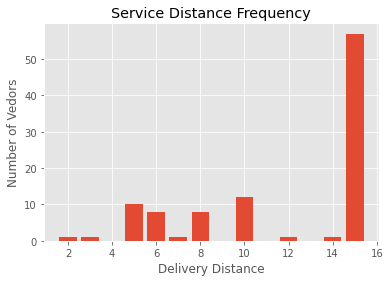

In [71]:
#Delivery distance frequency 
delivery_dist=vendors['serving_distance'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_dist.sort_values(by='unique_values', ascending=True)
x=delivery_dist['unique_values']
y=delivery_dist['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Service Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Number of Vedors")
plt.show
print(delivery_dist)

In [75]:
vendors.describe()

,id,authentication_id,latitude,longitude,vendor_category_id,delivery_charge,serving_distance,is_open,prepration_time,commission,discount_percentage,status,verified,rank,vendor_rating,open_close_flags,country_id,city_id,device_type,display_orders
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,85.0,100.000000,100.00000,100.000000,100.00000,100.000000,100.0,100.0,100.0,100.00,100.0
mean,288.840000,120050.760000,1.875505,0.803682,2.110000,0.413000,11.750000,0.85000,14.03000,0.0,1.100000,0.85000,0.880000,9.90000,4.350000,1.0,1.0,1.0,2.98,1.0
std,242.299994,3509.069064,20.600857,4.397859,0.314466,0.346018,4.108073,0.35887,4.31688,0.0,6.299751,0.35887,0.326599,3.14466,0.248836,0.0,0.0,0.0,0.20,0.0
min,4.000000,118597.000000,-1.787413,-1.449556,2.000000,0.000000,2.000000,0.00000,5.00000,0.0,0.000000,0.00000,0.000000,1.00000,3.200000,1.0,1.0,1.0,1.00,1.0
25%,105.750000,118702.750000,-0.809124,0.081618,2.000000,0.000000,8.000000,1.00000,10.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.200000,1.0,1.0,1.0,3.00,1.0
50%,202.000000,118801.000000,-0.493421,0.527123,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.400000,1.0,1.0,1.0,3.00,1.0
75%,387.250000,118990.250000,0.015915,0.644764,2.000000,0.700000,15.000000,1.00000,15.00000,0.0,0.000000,1.00000,1.000000,11.00000,4.500000,1.0,1.0,1.0,3.00,1.0
max,907.000000,132953.000000,205.242327,44.210807,3.000000,0.700000,15.000000,1.00000,45.00000,0.0,50.000000,1.00000,1.000000,11.00000,4.800000,1.0,1.0,1.0,3.00,1.0


    unique_values  counts
0              15      36
1              10      25
2              14       7
3              17       6
4              13       5
5              11       5
6              16       4
7              20       3
8              19       2
9              18       2
10             12       2
11             45       1
12             21       1
13              5       1


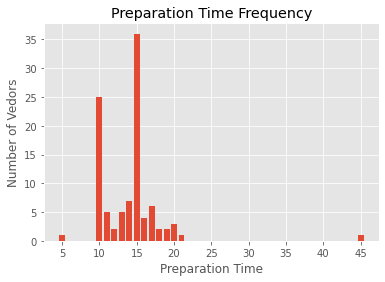

In [72]:
#prepration_time analysis
vendor_prep_time=vendors['prepration_time'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_prep_time.sort_values(by='unique_values', ascending=True)
x=vendor_prep_time['unique_values']
y=vendor_prep_time['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Preparation Time Frequency")
plt.xlabel("Preparation Time")
plt.ylabel("Number of Vedors")
plt.show
print(vendor_prep_time)

In [44]:
#discount_percentage analysis
vendor_discount_percentage=vendors['discount_percentage'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_discount_percentage.sort_values(by='unique_values', ascending=True)

,unique_values,counts
0,0.0,96
4,10.0,1
1,15.0,1
2,35.0,1
3,50.0,1


    unique_values  counts
0             4.5      19
1             4.3      18
2             4.2      15
3             4.4      14
4             4.6      10
5             4.7       7
6             4.0       6
7             4.1       5
8             3.8       2
9             4.8       2
10            3.2       1
11            3.7       1


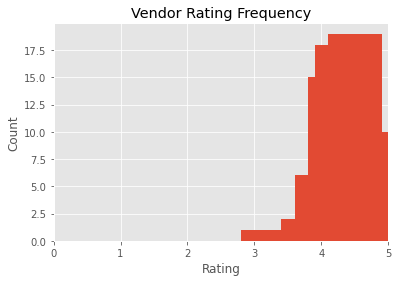

In [45]:
#vendor_rating analysis
vendor_rating=vendors['vendor_rating'].value_counts().rename_axis('unique_values').reset_index(name='counts')
vendor_rating.sort_values(by='unique_values', ascending=True)
x=vendor_rating['unique_values']
y=vendor_rating['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Vendor Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xlim(0,5)
plt.show
print(vendor_rating)

    unique_values  counts
0             2.0   41921
1             1.0   40951
2             3.0   23349
3             4.0   11084
4             5.0    5280
5             6.0    2660
6             7.0    1333
7             8.0     716
8             9.0     370
9            10.0     268
10           11.0     151
11           12.0      99
12           13.0      57
13           14.0      33
14           17.0      19
15           15.0      19
16           16.0      18
17           20.0      11
18           18.0       7
19           19.0       6
20           22.0       4
21           25.0       3
22           21.0       3
23           30.0       2
24           28.0       2
25           41.0       2
26           27.0       2
27           38.0       1
28           26.0       1
29           34.0       1
30           24.0       1
31           47.0       1
32           68.0       1
33           33.0       1
34           40.0       1


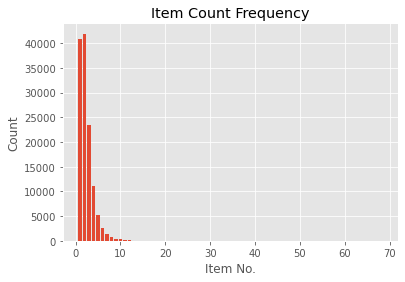

In [46]:
#item_count analysis
order_item_count=orders['item_count'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_item_count.sort_values(by='unique_values', ascending=True)
x=order_item_count['unique_values']
y=order_item_count['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Item Count Frequency")
plt.xlabel("Item No.")
plt.ylabel("Count")
plt.show
print(order_item_count)

In [105]:
orders.describe()

,akeed_order_id,item_count,grand_total,payment_mode,vendor_discount_amount,promo_code_discount_percentage,vendor_rating,driver_rating,deliverydistance,preparationtime,vendor_id,LOCATION_NUMBER
count,135233.000000,128378.000000,135303.000000,135303.000000,135303.000000,65880.000000,45220.000000,135303.000000,135303.000000,79743.000000,135303.000000,135303.000000
mean,265190.206155,2.405404,15.374513,1.345159,0.001053,0.026639,1.959730,0.675366,4.104255,43.181721,239.214866,0.867527
std,85051.488939,1.645332,12.556177,0.763712,0.047331,0.813320,2.313294,1.667261,4.361884,7.107582,226.437406,1.239884
min,11044.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,4.000000,0.000000
25%,190852.000000,1.000000,8.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,84.000000,0.000000
50%,267166.000000,2.000000,11.700000,1.000000,0.000000,0.000000,0.000000,0.000000,2.900000,45.000000,157.000000,0.000000
75%,336230.000000,3.000000,18.500000,1.000000,0.000000,0.000000,5.000000,0.000000,7.920000,45.000000,299.000000,1.000000
max,415515.000000,68.000000,783.800000,5.000000,10.650000,25.000000,5.000000,5.000000,19.810000,90.000000,907.000000,25.000000


In [99]:
order_item_count1=order_item_count[order_item_count['unique_values']<=10]




   unique_values  counts
0            2.0   41921
1            1.0   40951
2            3.0   23349
3            4.0   11084
4            5.0    5280
5            6.0    2660
6            7.0    1333
7            8.0     716
8            9.0     370
9           10.0     268


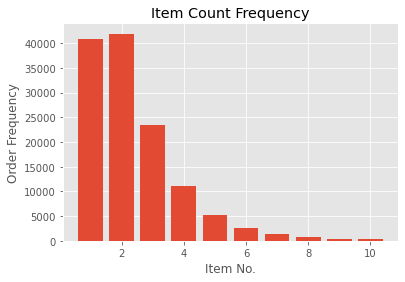

In [101]:
x=order_item_count1['unique_values']
y=order_item_count1['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Item Count Frequency")
plt.xlabel("Item No.")
plt.ylabel("Order Frequency")
plt.show
print(order_item_count1)

      unique_values  counts
0               9.5    2741
1              10.1    2726
2               8.4    2697
3               6.8    2662
4               9.0    2522
...             ...     ...
1043          174.6       1
1044          109.8       1
1045           94.3       1
1046           56.2       1
1047          108.6       1

[1048 rows x 2 columns]


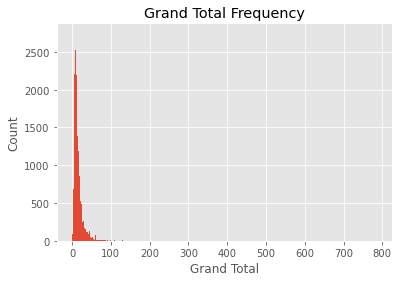

In [47]:
#grand_total analysis
order_grand_total=orders['grand_total'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_grand_total.sort_values(by='unique_values', ascending=True)
x=order_grand_total['unique_values']
y=order_grand_total['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Grand Total Frequency")
plt.xlabel("Grand Total")
plt.ylabel("Count")
plt.show
print(order_grand_total)

      unique_values  counts
0               9.5    2741
1              10.1    2726
2               8.4    2697
3               6.8    2662
4               9.0    2522
...             ...     ...
1043          174.6       1
1044          109.8       1
1045           94.3       1
1046           56.2       1
1047          108.6       1

[1048 rows x 2 columns]


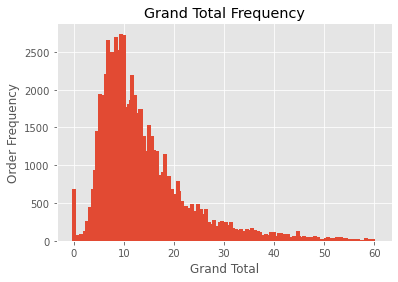

In [108]:
order_grand_total1=order_grand_total[order_grand_total['unique_values']<=60]
x=order_grand_total1['unique_values']
y=order_grand_total1['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Grand Total Frequency")
plt.xlabel("Grand Total")
plt.ylabel("Order Frequency")
plt.show
print(order_grand_total)

TypeError: 'pandas._libs.interval.Interval' object is not subscriptable

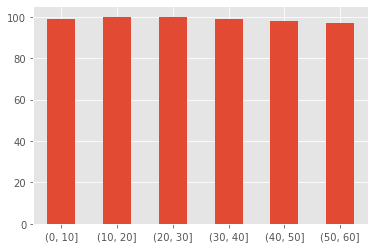

In [132]:
s=order_grand_total1['unique_values']
out = pd.cut(s, bins=[0,10,20,30,40,50,60], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, figsize=(6,4))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.title("Delivery Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Number of orders")
plt.show()

In [48]:
len(orders)

135303

In [49]:
order_grand_total.describe()

,unique_values,counts
count,1048.000000,1048.000000
mean,59.789695,129.105916
std,48.743275,381.200546
min,0.000000,1.000000
25%,26.275000,2.000000
50%,52.850000,9.000000
75%,83.825000,56.000000
max,783.800000,2741.000000


In [50]:
#pd.qcut(order_grand_total['unique_values'], q=4)

   unique_values  counts
0              1  104714
1              2   22079
2              4    6696
3              3    1361
4              5     453


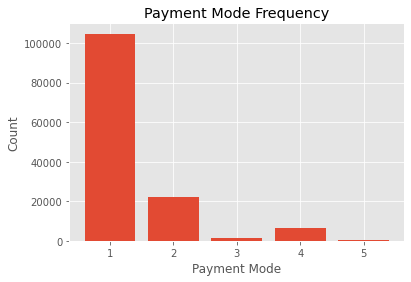

In [51]:
#payment_mode analysis
order_payment_mode=orders['payment_mode'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_payment_mode.sort_values(by='unique_values', ascending=True)
x=order_payment_mode['unique_values']
y=order_payment_mode['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Payment Mode Frequency")
plt.xlabel("Payment Mode")
plt.ylabel("Count")
plt.show
print(order_payment_mode)

In [52]:
#frequency of customer orders analysis
order_cust_freq=orders['customer_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_cust_freq.sort_values(by='unique_values', ascending=True)

,unique_values,counts
20554,000THBA,1
24298,002510Y,1
13441,005ECL6,2
17802,0075AM7,1
8684,009UFS1,4
...,...,...
17277,ZZVGIVK,2
2731,ZZVLIB5,12
23252,ZZWKMGG,1
3671,ZZY3N0D,9


In [53]:
order_cust_freq.describe()

,counts
count,27445.000000
mean,4.929969
std,7.621525
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,262.000000


In [54]:
#frequency of vendor orders analysis
order_ven_freq=orders['vendor_id'].value_counts().rename_axis('unique_values').reset_index(name='counts')
order_ven_freq.sort_values(by='unique_values', ascending=True)

,unique_values,counts
10,4,2137
73,13,731
22,20,1587
50,23,920
24,28,1537
14,33,1938
39,43,1083
29,44,1417
70,55,751
90,66,592


In [55]:
order_ven_freq.describe()

,unique_values,counts
count,100.000000,100.00000
mean,288.840000,1353.03000
std,242.299994,1178.32182
min,4.000000,474.00000
25%,105.750000,730.50000
50%,202.000000,941.00000
75%,387.250000,1529.50000
max,907.000000,7807.00000


      unique_values  counts
1              9.16     188
2              9.23     164
3              9.61     162
4              9.17     159
5              8.44     158
...             ...     ...
1508          17.20       1
1509          16.64       1
1510           0.17       1
1511          15.11       1
1512          16.26       1

[1512 rows x 2 columns]


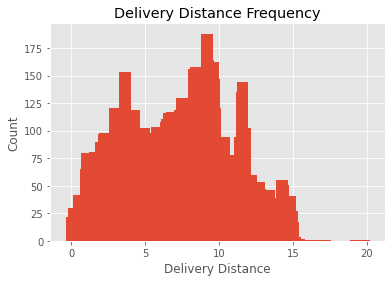

In [129]:
#Delivery distance frequency 
delivery_dist_orders=orders['deliverydistance'].value_counts().rename_axis('unique_values').reset_index(name='counts')
delivery_dist_orders.sort_values(by='unique_values', ascending=True)
delivery_dist_orders=delivery_dist_orders[delivery_dist_orders['unique_values']>0]
x=delivery_dist_orders['unique_values']
y=delivery_dist_orders['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Delivery Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Count")
plt.show
print(delivery_dist_orders)

TypeError: 'pandas._libs.interval.Interval' object is not subscriptable

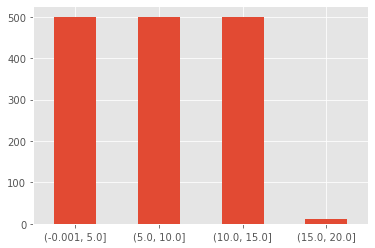

In [127]:
s=delivery_dist_orders['unique_values']
out = pd.cut(s, bins=[0,5,10,15,20], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, figsize=(6,4))
ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.title("Delivery Distance Frequency")
plt.xlabel("Delivery Distance")
plt.ylabel("Number of orders")
plt.show()

    unique_values  counts
0            45.0   23692
1            40.0   19865
2            35.0   13801
3            50.0   11901
4            55.0    4065
5            30.0    3617
6            60.0    1815
7            65.0     683
8            70.0     161
9            25.0      60
10           75.0      51
11           80.0      19
12           85.0      10
13           90.0       3


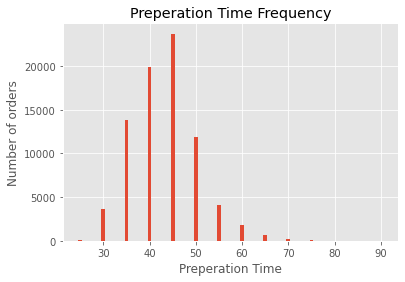

In [130]:
#Preperation time frequency 
prep_time_orders=orders['preparationtime'].value_counts().rename_axis('unique_values').reset_index(name='counts')
prep_time_orders.sort_values(by='unique_values', ascending=True)
x=prep_time_orders['unique_values']
y=prep_time_orders['counts']
plt.bar(x,y)
plt.grid=(True)
plt.title("Preperation Time Frequency")
plt.xlabel("Preperation Time")
plt.ylabel("Number of orders")
plt.show
print(prep_time_orders)

In [58]:
#vendor_tag=pd.DataFrame(columns=['vendor_id','vendor_tag'])
#v=np.ndarray(shape=(100,10))
#i=0
#j=0
#for i in range (0,4):
    #v[j][i]=literal_eval(vendors['vendor_tag'][i],)
   # g=literal_eval(vendors['vendor_tag'][i],)
   # print(len(g))
   # vs=len(g)
   # for j in range (0,10):
        #vendor_tag1=({'vendor_id':vendors['id'][i],'vendor_tag':g[i]})
        #vendor_tag.append(vendor_tag1,ignore_index=True)
#vendor_tag



#vendor_tag=pd.DataFrame(columns=['vendor_id','vendor_tag'])
#vendor_temp=vendors[['id','vendor_tag']]
#delivery_chrg=vendors['delivery_charge'].value_counts().rename_axis('unique_values').reset_index(name='counts')
#delivery_chrg


    #v[0].append(literal_eval(vendors['vendor_tag'][i])) 

In [59]:
vendor_tag=vendors[['id','vendor_tag','vendor_tag_name']]
vendor_tag['tags'] = vendor_tag['vendor_tag_name'].str.split(",")
vendor_temp=pd.melt(vendor_tag,id_vars=['id'], value_vars=['tags'])
vendor_temp

<ipython-input-59-47c03a94dd53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendor_tag['tags'] = vendor_tag['vendor_tag_name'].str.split(",")


,id,variable,value
0,4,tags,"[Arabic, Breakfast, Burgers, Desserts, Free De..."
1,13,tags,"[Breakfast, Cakes, Crepes, Italian, Pasta, Piz..."
2,20,tags,"[Breakfast, Desserts, Free Delivery, Indian]"
3,23,tags,"[Burgers, Desserts, Fries, Salads]"
4,28,tags,[Burgers]
5,33,tags,"[Desserts, Mexican]"
6,43,tags,"[American, Burgers, Fries, Sandwiches]"
7,44,tags,"[American, Burgers, Fries, Sandwiches]"
8,55,tags,"[Breakfast, Desserts, Grills, Milkshakes, Sala..."
9,66,tags,"[Breakfast, Burgers, Desserts, Indian, Salads]"


In [60]:
q=pd.DataFrame({vendor_tag['id'][0]:vendor_tag['tags'][0]},)
for i in range (1,100):
    q[vendor_tag['id'][i]]=pd.Series(vendor_tag['tags'][i])
q

,4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,188,189,191,192,193,195,196,197,199,201,203,207,216,221,225,231,237,243,250,259,265,271,274,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907
0,Arabic,Breakfast,Breakfast,Burgers,Burgers,Desserts,American,American,Breakfast,Breakfast,Breakfast,Asian,Sandwiches,Pizzas,Burgers,Arabic,Breakfast,Breakfast,Burgers,Desserts,Cakes,American,Asian,American,American,American,Asian,Arabic,Desserts,Burgers,Arabic,Breakfast,Arabic,American,Biryani,American,American,Burgers,Breakfast,Arabic,Italian,Sandwiches,Fresh Juices,Fresh Juices,Arabic,Burgers,NaN,Free Delivery,Cakes,Biryani,American,Arabic,Coffee,Fresh Juices,Breakfast,NaN,American,NaN,American,American,Desserts,American,Cakes,Asian,American,Burgers,Coffee,Free Delivery,Combos,Coffee,Coffee,American,Bagels,American,Churros,American,Omani,Frozen yoghurt,Arabic,Burgers,American,Fresh Juices,Burgers,Coffee,Burgers,Fresh Juices,Fresh Juices,Fresh Juices,Biryani,Biryani,Biryani,American,American,American,American,American,American,American,American,Fatayers
1,Breakfast,Cakes,Desserts,Desserts,NaN,Mexican,Burgers,Burgers,Desserts,Burgers,Desserts,Desserts,Breakfast,Italian,Desserts,Breakfast,Desserts,Desserts,Fries,Omani,Crepes,Burgers,Fresh Juices,Burgers,Burgers,Burgers,Dimsum,Desserts,Free Delivery,Healthy Food,Pizzas,Burgers,NaN,Burgers,Desserts,Burgers,Burgers,Desserts,Desserts,Grills,Pasta,Shawarma,Milkshakes,Milkshakes,Burgers,Fries,NaN,Mexican,Crepes,Desserts,Sandwiches,Biryani,Organic,Healthy Food,Free Delivery,NaN,Burgers,NaN,Breakfast,Burgers,Free Delivery,Burgers,Donuts,Desserts,Burgers,Desserts,Fresh Juices,Fresh Juices,Fries,Fresh Juices,Fresh Juices,Breakfast,Desserts,Kids meal,NaN,Breakfast,Arabic,Smoothies,Kushari,Free Delivery,Burgers,Lebanese,Desserts,Pancakes,Desserts,Sandwiches,Sandwiches,Sandwiches,Desserts,Desserts,Desserts,Breakfast,Breakfast,Breakfast,Breakfast,Breakfast,Burgers,Breakfast,Breakfast,Mojitos
2,Burgers,Crepes,Free Delivery,Fries,NaN,NaN,Fries,Fries,Grills,Desserts,Grills,Healthy Food,Burgers,Breakfast,Free Delivery,Desserts,Lebanese,Salads,Kids meal,NaN,Desserts,Desserts,Kids meal,Free Delivery,Free Delivery,Free Delivery,Grills,Free Delivery,Healthy Food,Milkshakes,Sandwiches,Grills,NaN,Mishkak,Indian,Sandwiches,Kids meal,Pastry,Grills,Indian,Pizzas,Fresh Juices,Mojitos,Mojitos,Sandwiches,Grills,NaN,Salads,Desserts,Indian,Hot Dogs,Chinese,NaN,Smoothies,Fresh Juices,NaN,Desserts,NaN,Rolls,Kids meal,Fresh Juices,Kids meal,NaN,Rice,Fries,Free Delivery,Hot Chocolate,Pastas,Mojitos,Hot Chocolate,Hot Chocolate,Burgers,Salads,Pasta,NaN,Burgers,Shuwa,NaN,Sandwiches,Milkshakes,Desserts,Sandwiches,Free Delivery,Spanish Latte,Family Meal,Shawarma,Shawarma,Shawarma,Indian,Indian,Indian,Burgers,Burgers,Burgers,Burgers,Burgers,Desserts,Burgers,Burgers,Sandwiches
3,Desserts,Italian,Indian,Salads,NaN,NaN,Sandwiches,Sandwiches,Milkshakes,Indian,Milkshakes,Japanese,Mojitos,Soups,Pasta,Mandazi,Manakeesh,Arabic,Shawarma,NaN,Donuts,Mojitos,NaN,Hot Dogs,Hot Dogs,Hot Dogs,Japanese,Indian,Sweets,Sandwiches,NaN,Pizza,NaN,Salads,Rice,NaN,Sandwiches,Pizzas,Milkshakes,Pasta,Salads,Mojitos,Sandwiches,Sandwiches,Shawarma,Mishkak,NaN,NaN,Donuts,Soups,Fries,Grills,NaN,NaN,Fries,NaN,Donuts,NaN,Salads,Pasta,Healthy Food,Pasta,NaN,Salads,Mojitos,Grills,Sandwiches,Salads,Pasta,Sandwiches,Sandwiches,Fries,NaN,Pizzas,NaN,Desserts,Pasta,NaN,NaN,Mojitos,Free Delivery,Shawarma,Pasta,Waffles,Salads,NaN,NaN,NaN,Kebabs,Kebabs,Kebabs,Cafe,Cafe,Cafe,Cafe,Cafe,Free Delivery,Cafe,Cafe,NaN
4,Free Delivery,Pasta,NaN,NaN,NaN,NaN,NaN,NaN,Salads,Salads,Salads,Salads,NaN,Pasta,Sandwiches,Omani,Pizzas,NaN,NaN,NaN,Fresh Juices,Pasta,NaN,Pasta,Pasta,Pasta,Rice,NaN,NaN,Steaks,NaN,Sandwiches,NaN,Sandwiches,Thali,NaN,NaN,NaN,Salads,Salads,Sandwiches,Milkshakes,Shawarma,Shawarma,

In [61]:
n=pd.melt(q, value_vars=[4,13,20,23,28,33,43,44,55,66,67,75,76,78,79,81,82,83,84,85,86,90,92,104,105,106,110,113,115,134,145,148,149,154,157,159,160,161,176,180,188,189,191,192,193,195,196,197,199,201,203,207,216,221,225,231,237,243,250,259,265,271,274,288,289,294,295,298,299,300,303,304,310,356,386,391,398,401,419,459,537,547,573,575,577,578,582,583,676,679,681,841,843,845,846,849,855,856,858,907])
#for i in z:
    #n.append(pd.melt(q, value_vars=[i]))  
    
#n.shape
n

,variable,value
0,4,Arabic
1,4,Breakfast
2,4,Burgers
3,4,Desserts
4,4,Free Delivery
...,...,...
995,907,NaN
996,907,NaN
997,907,NaN
998,907,NaN


In [62]:
n = n[n['value'].notna()]

In [63]:
n

,variable,value
0,4,Arabic
1,4,Breakfast
2,4,Burgers
3,4,Desserts
4,4,Free Delivery
...,...,...
988,858,Kids meal
989,858,Salads
990,907,Fatayers
991,907,Mojitos


In [64]:
n1=n['value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
n1.sort_values(by='counts', ascending=False)

,unique_values,counts
0,Desserts,44
1,Sandwiches,42
2,Burgers,40
3,Salads,33
4,American,27
5,Breakfast,24
6,Free Delivery,24
7,Fries,20
8,Fresh Juices,17
9,Pasta,16


In [65]:
custid=pd.Series(orders['customer_id'])
venid=pd.Series(orders['vendor_id'])
bv1=pd.DataFrame({'customer_id':custid,'vendor':venid})
bv1['vendor']=bv1['vendor'].apply(str)
fbv1=(bv1.groupby('customer_id').vendor.agg([('count', 'count'), ('vendor', ', '.join)])
   .reset_index())

In [66]:
ebv1 = bv1
ebv1 = bv1.drop_duplicates( keep="first")
ebv1['vendor']=bv1['vendor'].apply(str)
efbv1=(ebv1.groupby('customer_id').vendor.agg([('vendor', ', '.join),('count', 'count')])
   .reset_index())
efbv1

<ipython-input-66-3322f62e493a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ebv1['vendor']=bv1['vendor'].apply(str)


,customer_id,vendor,count
0,000THBA,148,1
1,002510Y,157,1
2,005ECL6,237,1
3,0075AM7,145,1
4,009UFS1,"193, 83, 304, 84",4
...,...,...,...
27440,ZZVGIVK,"78, 79",2
27441,ZZVLIB5,"110, 221, 23, 225",4
27442,ZZWKMGG,192,1
27443,ZZY3N0D,"85, 189, 86, 225, 459, 356, 419, 537",8


In [67]:
fbv1.to_csv('fbv1.csv')

In [68]:
#customer order count
fbv1.sort_values(by='count', ascending=False)

,customer_id,count,vendor
25804,XW90EAP,262,"4, 13, 33, 159, 13, 13, 13, 13, 13, 13, 13, 33..."
22564,TL7Z2DM,151,"75, 20, 75, 75, 75, 75, 75, 113, 78, 75, 106, ..."
23909,VDEJEMP,146,"20, 221, 300, 81, 81, 81, 300, 300, 300, 4, 30..."
13319,HJFTTGW,128,"159, 159, 4, 176, 159, 159, 159, 104, 104, 104..."
8431,B28LJKM,119,"192, 92, 4, 134, 159, 303, 92, 192, 33, 4, 110..."
...,...,...,...
13486,HRBMGRJ,1,33
13487,HRCVHZO,1,161
13489,HROTEYJ,1,849
13490,HRPUOKP,1,189


In [69]:
#
#
#
#    Customer Profile
#
#
#
cfbv1 =pd.merge(fbv1, efbv1, on ='customer_id', how ='left')
cfbv1

,customer_id,count_x,vendor_x,vendor_y,count_y
0,000THBA,1,148,148,1
1,002510Y,1,157,157,1
2,005ECL6,2,"237, 237",237,1
3,0075AM7,1,145,145,1
4,009UFS1,4,"193, 83, 304, 84","193, 83, 304, 84",4
...,...,...,...,...,...
27440,ZZVGIVK,2,"78, 79","78, 79",2
27441,ZZVLIB5,12,"110, 110, 110, 110, 110, 221, 23, 110, 110, 11...","110, 221, 23, 225",4
27442,ZZWKMGG,1,192,192,1
27443,ZZY3N0D,9,"85, 189, 189, 86, 225, 459, 356, 419, 537","85, 189, 86, 225, 459, 356, 419, 537",8


In [70]:
def most_frequent(List): 
    counter = 0
    jj='0,'+List
    j=literal_eval(jj)
    num = j[0] 
    ctr=[]
    venc=[]
      
    for i in j: 
        curr_frequency = j.count(i) 
        if(curr_frequency>= counter): 
            counter = curr_frequency 
            num = i 
            ctr.append(curr_frequency)
            venc.append(i)
    tdf=pd.DataFrame({"vendor":venc,"ctr":ctr})
    tdf=tdf[tdf['ctr']==counter]
    tdf=tdf[tdf['vendor']!=0]
    tdf= tdf.drop_duplicates(subset='vendor', keep="first")
    tdf1=list(tdf['vendor'])
    tdf2=','.join(str(e) for e in tdf1)
    
    return tdf2 
#for i in range (0,27445):
cfbv1['Pop_v']=most_frequent(cfbv1['vendor_x'])
cfbv1

ValueError: malformed node or string: 0                                                    0,148
1                                                    0,157
2                                               0,237, 237
3                                                    0,145
4                                       0,193, 83, 304, 84
                               ...                        
27440                                             0,78, 79
27441    0,110, 110, 110, 110, 110, 221, 23, 110, 110, ...
27442                                                0,192
27443          0,85, 189, 189, 86, 225, 459, 356, 419, 537
27444                                                0,243
Name: vendor_x, Length: 27445, dtype: object

In [ ]:

type(cfbv1['vendor_x'][2])

In [ ]:

cfbv1


In [ ]:
cfbv1.iloc[1,2]

In [ ]:
js=list(filter(lambda a: a !=gh , j))
js

In [ ]:
cfbv1.iloc[27441,2]

In [ ]:
gh=110

In [ ]:
#vendor with most order
bv2=orders['vendor_id'].value_counts().rename_axis('vendor_id').reset_index(name='counts')
bv2.sort_values(by='counts', ascending=False)


In [ ]:
bv22=pd.DataFrame(orders['vendor_id'])
bv22

In [ ]:
#bv2['vendor_id']=bv2['vendor_id'].apply(str)
#bv2 = bv2.drop_duplicates(subset='vendor_id', keep="first")
#vendor_tag2['vendor_id']=vendor_tag2['vendor_id'].apply(str)
#vendor_tag2 = vendor_tag2.drop_duplicates(subset='vendor_id', keep="first")
#fbv2=pd.merge(bv2, vendor_tag2, on ='vendor_id', how ='left')

In [ ]:
y=n
y= y.rename({'variable': 'vendor_id'}, axis=1)
fbv2=pd.merge(bv22, y, on ='vendor_id', how ='left')
fbv2

In [ ]:
#most popular tag
pop_tag=fbv2['value'].value_counts().rename_axis('unique_values').reset_index(name='counts')
pop_tag.sort_values(by='counts', ascending=False)

In [ ]:
loc_train_cust=train_loc[['customer_id','location_number','latitude','longitude']]
loc_train_cust['location_number_obj']=loc_train_cust['location_number'].astype(str)
loc_train_cust['CID X LOC_NUM'] = loc_train_cust['customer_id'] +' X '+ loc_train_cust['location_number_obj']
loc_train_cust

In [ ]:
loc_vend=vendors[['id','latitude','longitude','serving_distance']]
loc_vend=loc_vend.rename({'id': 'vendor_id'}, axis=1)
loc_vend

In [ ]:
loc_ord=orders[['customer_id','LOCATION_NUMBER','vendor_id','deliverydistance']]
loc_ord['location_number_obj']=loc_ord['LOCATION_NUMBER'].astype(str)
loc_ord['CID X LOC_NUM'] = loc_ord['customer_id'] +' X '+ loc_ord['location_number_obj']
loc_ord

In [ ]:
loc_dist=pd.merge(loc_ord, loc_train_cust, on ='CID X LOC_NUM', how ='left')

In [ ]:
loc_dist1=pd.merge(loc_dist, loc_vend, on ='vendor_id', how ='left')
loc_dist1

In [ ]:
def haversine(lat1, lon1, lat2, lon2,to_radians=True, earth_radius=6371):
    

    #if to_radians:
        #lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))


loc_dist1['DISTANCE'] = \
    haversine(loc_dist1['latitude_x'], loc_dist1['longitude_x'], loc_dist1['latitude_y'], loc_dist1['longitude_y'])

In [ ]:
loc_dist1

In [ ]:
vendors.describe()

In [ ]:
orders[orders['deliverydistance']==0]

In [ ]:

location = geolocator.reverse("12.367983,78.685386")

print(location.address)

In [ ]:
loc_vend['Radian_Address']=""
for i in range (0,100):
    try:
        a=str(np.degrees(loc_vend.iloc[i,1]))
        b=str(np.degrees(loc_vend.iloc[i,2]))
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_vend.iloc[i,4]= location.address
    except TypeError:
        loc_vend.iloc[i,4]= "Error"
    except ValueError:
        loc_vend.iloc[i,4]= "Error"
        
    
#loc_vend['Address'] = locchk(loc_vend['latitude'],loc_vend['longitude'])

In [ ]:
loc_vend['Degree_Address']=""
for i in range (0,100):
    try:
        a=str(loc_vend.iloc[i,1])
        b=str(loc_vend.iloc[i,2])
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_vend.iloc[i,5]= location.address
    except TypeError:
        loc_vend.iloc[i,5]= "Error"
    except ValueError:
        loc_vend.iloc[i,5]= "Error"

In [ ]:
#loc_train_cust=loc_train_cust.head(100)
loc_train_cust['Radian_Address']=""
for i in range (0,59503):
    try:
        a=str(np.degrees(loc_train_custo.iloc[i,2]))
        b=str(np.degrees(loc_train_custo.iloc[i,3]))
        acq=a+','+b
        print("acq="+acq)
        location = geolocator.reverse(acq)
        loc_train_custo.iloc[i,8]= location.address
        print("Loc Address"+location.address)
    except TypeError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Type Error")
    except ValueError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Value Error")
    except IndexError:
        loc_train_custo.iloc[i,8]= "Error"
        print("Index Error")

In [ ]:
is_NaN = loc_train_cust.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = loc_train_cust[row_has_NaN]
rows_with_NaN

In [ ]:
loc_vend

In [ ]:
loc_vend[loc_vend['Radian_Address'].str.contains("Tanzania")]

loc_vend

In [ ]:
lat2=str(math.degrees(0.21586202518068584))

long2=str(math.degrees(1.3733190589026507))

latlong= lat2+','+long2

location = geolocator.reverse(latlong)
print(latlong)
print(location.address)

In [ ]:
location = geolocator.reverse("-33.7240666382822,43.225884121172754")
print(location.address)

In [ ]:
math.radians(12.367983)

In [ ]:
math.radians(78.685386)

In [ ]:
a=str(np.degrees(-0.588596))
b=str(np.degrees(0.754434))
c=a+','+b
location = geolocator.reverse(c)
print(location.address)

In [ ]:
loc_vend

In [ ]:
loc_train_cust

In [ ]:
loc_train_cust['dlat']=np.degrees(loc_train_cust['latitude'])
loc_train_cust['dlong']=np.degrees(loc_train_cust['longitude'])
loc_train_cust

In [ ]:
loc_train_custo=loc_train_cust[(loc_train_cust['dlat']<=25)&(loc_train_cust['dlat']>=15)&(loc_train_cust['dlong']>=52)&(loc_train_cust['dlong']<=59.87)]

In [ ]:
loc_train_custo

In [ ]:
loc_train_custo[loc_train_custo['Radian_Address'].str.contains("Oman")]

In [ ]:
loc_train_custo=loc_train_cust[(loc_train_cust['latitude']<=25)&(loc_train_cust['latitude']>=15)&(loc_train_cust['longitude']>=52)&(loc_train_cust['longitude']<=59.87)]

In [ ]:
loc_train_custo

In [ ]:
train_loc

In [ ]:
dist1=train_loc[['customer_id','location_number','latitude','longitude']]
dist2=vendors[['id','latitude','longitude']]
dist=dist1.assign(key=1).merge(dist2.assign(key=1), on='key').drop('key',axis=1)

In [ ]:
dist['distance'] = \
    haversine(dist['latitude_x'], dist['longitude_x'], dist['latitude_y'], dist['longitude_y'])

In [ ]:
dist

In [ ]:
dist_des=dist['distance'].value_counts(bins =10).rename_axis('distance').reset_index(name='counts')
dist_des.sort_values(by='distance', ascending=True)

In [ ]:
dist.describe()

In [ ]:
dist.sort_values(by='distance', ascending=True)

In [ ]:
dist4=dist[(dist['distance']>=0)&(dist['distance']<=15)]

In [ ]:
dist4

# 